# **SentimentArcs (Part 2): SyuzhetR and SentimentR Models**

```
Jon Chun
12 Jun 2021: Started
04 Mar 2022: Last Update
```

* These are two Diachronic Sentiment Analysis Libraries in R that provide the basis the simplist two model famlies. These two contribute 4 Lexical and 7 Heuristic Models to SentimentArc's ensemble of over 34 models as of March 2022.

* SyuzhetR by Matthew Jockers combines several popular lexicons as well as its own combined Syuzhet lexicon to analyse sentiment in text. A number of utilities facilitate the manipulation of text, calculation of sentiment time series and various plotting options. https://cran.r-project.org/web/packages/syuzhet/syuzhet.pdf 

* SentimentR by Tyler Rinker expands upon SyuzhetR by adding more sentiment lexicons, new emotion lexicons, profanity lexicons, heuristics and visualizations. Seven models from SentimentR form most of the Heuristic Family of models that add both custom and fixed rules to alter sentiments due to factors like negation (not happy), intensifiers (very mad), capitalization (FURIOUS), punctuation (WTF?!?!?!?!), etc.  https://cran.r-project.org/web/packages/sentimentr/sentimentr.pdf

* SentimentArcs software consists of a series of Google Colab Jupyter notebooks in Python for ease of use, portability and low/no cost. To run these two R Libraries requires two different approaches to load R within a Python environment and exchange data structures between Python and R. The SentimentArcs Github repo contains R Scripts which will run significantly faster for those familiar with RStudio or R on the command line.

# **[RESTART RUNTIME] May be Required for these Libaries**

In [ ]:
# Intentionally left Blank

# **[STEP 1] Manual Configuration/Setup**



## (Popups) Connect Google gDrive

In [ ]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


## (3 Inputs) Define Directory Tree

In [ ]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.



# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/cdh/sentiment_arcs/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}

#@markdown (e.g. /gdrive/MyDrive/research/sentiment_arcs/)



#@markdown **Sentiment Arcs Directory Structure** \
#@markdown \
#@markdown **1. Input Directories:** \
#@markdown (a) Raw textfiles in subdir: ./text_raw/(text_type)/  \
#@markdown (b) Cleaned textfiles in subdir: ./text_clean/(text_type)/ \
#@markdown \
#@markdown **2. Output Directories** \
#@markdown (1) Raw Sentiment time series datafiles and plots in subdir: ./sentiment_raw/(text_type) \
#@markdown (2) Cleaned Sentiment time series datafiles and plots in subdir: ./sentiment_clean/(text_type) \
#@markdown \
#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

Corpus_Type = "new" #@param ["new", "reference"]

#@markdown Please check that the required textfiles and datafiles exist in the correct subdirectories before continuing.


# **[STEP 2] Automatic Configuration/Setup**

In [ ]:
# Define all Sub/Dir global CONSTANTS

import os

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_subdirs.py'

get_subdirs(Corpus_Genre, Corpus_Type, 'syuzhetr2sentimentr')

Verify the Directory Structure:

-------------------------------

          [Corpus Genre]: novels

           [Corpus Type]: new


   [FNAME_SENTIMENT_RAW]: sentiment_raw_novels_new_syuzhetr2sentimentr.json


       [SUBDIR_TEXT_RAW]: ./text_raw/novels_text_new_raw/

     [SUBDIR_TEXT_CLEAN]: ./text_clean/novels_text_new_clean/

  [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/novels_sentiment_new_raw/

[SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/novels_sentiment_new_clean/

          [SUBDIR_PLOTS]: ./plots/

           [SUBDIR_DATA]: ./data/

          [SUBDIR_UTILS]: ./utils/



## Configure Jupyter Notebook

In [ ]:
# Configure Jupyter

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Read YAML Configuration for Corpus and Models 

In [ ]:
!pip install pyyaml
import yaml

In [71]:
# Define all Corpus Texts & Ensemble Models as global CONSTANTS

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/read_yaml.py'

read_yaml(Corpus_Genre, Corpus_Type)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = corpus_titles_dt.keys()
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

SentimentArcs Model Ensemble ------------------------------

AutoGluon_Text
BERT_2IMDB
BERT_Dual_Coding
BERT_Multilingual
BERT_Yelp
CNN_DNN
Distilled_BERT
FLAML_AutoML
Fully_Connected_Network
HyperOpt_CNN_Flair_AutoML
LSTM_DNN
Logistic_Regression
Logistic_Regression_CV
Multilingual_CNN_Stanza_AutoML
Multinomial_Naive_Bayes
Pattern
Random_Forest
RoBERTa_Large_15DB
RoBERTa_XML_8Language
SentimentR_Bing
SentimentR_Jockers
SentimentR_JockersRinker
SentimentR_LMcD
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_SentimentR
SyuzhetR_AFINN
SyuzhetR_Bing
SyuzhetR_NRC
SyuzhetR_SyuzhetR
T5_IMDB
TextBlob
VADER
XGBoost


Corpus Texts ------------------------------

scollins_thehungergames1
cmieville_thecityandthecity


There are 34 Models in the SentimentArcs Ensemble above.


There are 2 Texts in the Corpus above.





## Install Python Libraries

In [72]:
# Intentionally left blank

## Install and Configure R

In [73]:
# Load Jupyter rpy2 Extension  
#   enables the %%R magic commands

# !pip install rpy2  # Not necessary in Google Colab Pro

%load_ext rpy2.ipython

# %reload_ext rpy2.ipython  # Only use in dev mode to automatically reload

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [74]:
%%time 
%%capture 
%%R

# Install Syuzhet.R, Sentiment.R and Utility Libraries

# NOTE: 1m12s 
#       1m05s

install.packages(c('syuzhet', 'sentimentr', 'tidyverse', 'lexicon'))

library(syuzhet)
library(sentimentr)
library(tidyverse)
library(lexicon)

2022-03-04 05:48:34,753 : WARNING : R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

2022-03-04 05:48:35,926 : WARNING : R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/syuzhet_1.0.6.tar.gz'

2022-03-04 05:48:36,580 : WARNING : R[write to console]: Content type 'application/x-gzip'
2022-03-04 05:48:36,583 : WARNING : R[write to console]:  length 3059075 bytes (2.9 MB)

2022-03-04 05:48:36,615 : WARNING : R[write to console]: =
2022-03-04 05:48:36,646 : WARNING : R[write to console]: =
2022-03-04 05:48:36,650 : WARNING : R[write to console]: =
2022-03-04 05:48:36,676 : WARNING : R[write to console]: =
2022-03-04 05:48:36,679 : WARNING : R[write to console]: =
2022-03-04 05:48:36,681 : WARNING : R[write to console]: =
2022-03-04 05:48:36,684 : WARNING : R[write to console]: =
2022-03-04 05:48:36,686 : WARNING : R[write to console]: =
2022-03-04 05:48:36,707 : WARNING : R[write to console]: =
2022-03-04 05:48:36

CPU times: user 1.77 s, sys: 221 ms, total: 1.99 s
Wall time: 31.8 s


In [75]:
# Load Python libraries to exchange data with R Program Space and read R Datafiles

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [76]:
%%R

# Verify R Kernel Session Info
sessionInfo()

# Verfiy R Kernel Environment
# Sys.getenv

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] lexicon_1.2.1    forcats_0.5.1    stringr_1.4.0    dplyr_1.0.8     
 [5] purrr_0.3.4      readr_2.1.2      tidyr_1.2.0      tibble_3.1.6    
 [9] ggplot2_3.3.5    tidyverse_1.3.1  sentimentr_2.9.0 syuzhet_1.0.6   

loaded via a namespace (and not atta

## Load Libraries

In [77]:
# Core Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_colwidth', 100) # -1)

from glob import glob
import os
import json
# import yaml # Already done above
# import json # Already done above

## Define Global Parameters

In [78]:
# Define Globals

# Main data structure: Dictionary (key=text_name) of DataFrames (cols: text_raw, text_clean)
corpus_texts_dt = {}

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_globals.py'

SLANG_DT.keys()


dict_keys(['$', '€', '4ao', 'a.m', 'a3', 'aamof', 'acct', 'adih', 'afaic', 'afaict', 'afaik', 'afair', 'afk', 'app', 'approx', 'apps', 'asap', 'asl', 'atk', 'ave.', 'aymm', 'ayor', 'b&b', 'b+b', 'b.c', 'b2b', 'b2c', 'b4', 'b4n', 'b@u', 'bae', 'bak', 'bbbg', 'bbc', 'bbias', 'bbl', 'bbs', 'be4', 'bfn', 'blvd', 'bout', 'brb', 'bros', 'brt', 'bsaaw', 'btw', 'bwl', 'c/o', 'cet', 'cf', 'cia', 'csl', 'cu', 'cul8r', 'cv', 'cwot', 'cya', 'cyt', 'dae', 'dbmib', 'diy', 'dm', 'dwh', 'e123', 'eet', 'eg', 'embm', 'encl', 'encl.', 'etc', 'faq', 'fawc', 'fb', 'fc', 'fig', 'fimh', 'ft.', 'ft', 'ftl', 'ftw', 'fwiw', 'fyi', 'g9', 'gahoy', 'gal', 'gcse', 'gfn', 'gg', 'gl', 'glhf', 'gmt', 'gmta', 'gn', 'g.o.a.t', 'goat', 'goi', 'gps', 'gr8', 'gratz', 'gyal', 'h&c', 'hp', 'hr', 'hrh', 'ht', 'ibrb', 'ic', 'icq', 'icymi', 'idc', 'idgadf', 'idgaf', 'idk', 'ie', 'i.e', 'ifyp', 'IG', 'iirc', 'ilu', 'ily', 'imho', 'imo', 'imu', 'iow', 'irl', 'j4f', 'jic', 'jk', 'jsyk', 'l8r', 'lb', 'lbs', 'ldr', 'lmao', 'lmfao', 

## Setup Matplotlib Style

In [79]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------\n')
plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')




 New figure size:  (20, 10)
Matplotlib Configuration ------------------------------



KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a


  Edit ./utils/config_matplotlib.py to change


## Setup Seaborn Style

In [80]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')




Seaborn Configuration ------------------------------



## **Utility Functions**

### Generate Convenient Data Lists

In [81]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
corpus_titles_dt
print('\n')

corpus_texts_ls = list(corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


Dictionary: corpus_titles_dt


{'cmieville_thecityandthecity': ['The City and The City by China Mieville',
  2009,
  0],
 'scollins_thehungergames1': ['The Hunger Games 1 by Suzanne Collins ',
  2008,
  0]}




Corpus Texts:
  scollins_thehungergames1
  cmieville_thecityandthecity



Natural Corpus Titles:
  The Hunger Games 1 by Suzanne Collins 
  The City and The City by China Mieville


In [82]:
# get_model_families()

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_model_families.py'

ensemble_models_dt = get_model_famalies(models_titles_dt)

print('\nTest: Lexicon Family of Models:')
ensemble_models_dt['lexicon']


There are 6 Lexicon Models
  Lexicon Model #0: pattern
  Lexicon Model #1: sentimentr_sentimentr
  Lexicon Model #2: syuzhetr_afinn
  Lexicon Model #3: syuzhetr_bing
  Lexicon Model #4: syuzhetr_nrc
  Lexicon Model #5: syuzhetr_syuzhetr

There are 7 Heuristic Models
  Heuristic Model #0: sentimentr_bing
  Heuristic Model #1: sentimentr_jockers
  Heuristic Model #2: sentimentr_jockersrinker
  Heuristic Model #3: sentimentr_lmcd
  Heuristic Model #4: sentimentr_sentiword
  Heuristic Model #5: sentimentr_senticnet
  Heuristic Model #6: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg
  Traditional ML Model #3: logreg_cv
  Traditional ML Model #4: multinb
  Traditional ML Model #5: rf
  Traditional ML Model #6: textblob
  Traditional ML Model #7: xgb

There are 5 DNN Models
  DNN Model #0: cnn
  DNN Model #1: fcn
  DNN Model #2: flair
  DNN Model #3: lstm
  DNN Model #4: stanza

There are 8 Tra

['pattern',
 'sentimentr_sentimentr',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr']

### Text Cleaning 

In [83]:
# Test Text Cleaning Functions

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/text_cleaners.py'

### File Functions

In [84]:
# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read Clean Corpus Texts and any Existing Raw Sentiment Data**

**If Exists(Previous output from this Notebook #2):**
<br> Read Clean Corpus Text + SyuzhetR/SentimentR Sentiment Values
<br>**Else:**
<br>Read output from Notebook #1: Just Clean Corpus Texts

In [85]:
print(f'Trying to find EXISTING Raw Sentiment Datafile:\n  [{FNAME_SENTIMENT_RAW}]\n  in Raw Sentiment Subdir: {SUBDIR_SENTIMENT_RAW}\n')

corpus_texts_dt = {}
subdir_sentiment_raw_ls = os.listdir(SUBDIR_SENTIMENT_RAW)

if FNAME_SENTIMENT_RAW not in subdir_sentiment_raw_ls:
  # No Existing Raw Sentiment Data, Just read in Clean Text
  print(f'No EXISTING Raw Sentiment Datafile exists, Start from Stratch...\n')

  # Create a List (texts_clean_ls) of all preprocessed text files
  try:
    texts_clean_ls = glob(f'{SUBDIR_TEXT_CLEAN}*.csv')
    texts_clean_ls = [x.split('/')[-1] for x in texts_clean_ls]
    texts_clean_ls = [x.split('.')[0] for x in texts_clean_ls]
  except IndexError:
    raise RuntimeError('No csv file found')

  # Read all preprocessed text files into master DataFrame (corpus_dt)
  for i,anovel in enumerate(texts_clean_ls):
    print(f'Processing #{i}: {anovel}...')
    afile_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel}.csv'
    print(f'               {afile_fullpath}')
    anovel_df = pd.read_csv(afile_fullpath, index_col=[0])
    corpus_texts_dt[anovel] = anovel_df

  print('\n'.join(texts_clean_ls))
  print('\n')
  print(f'Found {len(texts_clean_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')
else:
  # Found Existing Raw Sentiment Data with Clean Text, Read Both
  print(f'Found EXISTING  Raw Sentiment Datafile exists, Loading...\n')
  corpus_texts_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
  print(f'The  Models have Analyzed these Texts in the Corpus:\n\n  {corpus_texts_dt.keys()}\n\n')    

# Verify Corpus DataFrame
corpus_titles_ls = list(corpus_texts_dt.keys())
# corpus_texts_dt[corpus_titles_ls[0]].head()
corpus_texts_dt[corpus_titles_ls[0]].info()

Trying to find EXISTING Raw Sentiment Datafile:
  [sentiment_raw_novels_new_syuzhetr2sentimentr.json]
  in Raw Sentiment Subdir: ./sentiment_raw/novels_sentiment_new_raw/

Found EXISTING  Raw Sentiment Datafile exists, Loading...

The  Models have Analyzed these Texts in the Corpus:

  dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sentimentr_huliu              10125 non-null  float64
 1   sentimentr_jockers            10125 non-null  float64
 2   sentimentr_jockersrinker      10125 non-null  float64
 3   sentimentr_loughran_mcdonald  10125 non-null  float64
 4   sentimentr_nrc                10125 non-null  float64
 5   sentimentr_senticnet          10125 non-null  float64
 6   sentimentr_sentiword          10125 non-null  float64


In [86]:
ensemble_models_dt['lexicon']

['pattern',
 'sentimentr_sentimentr',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr']

In [ ]:
models_ls = list(set(corpus_texts_dt[corpus_titles_ls[0]].columns) - set(['text_clean','text_raw']))
print(f'There are [{len(models_ls)} Models] in the Datafile for this Notebook:\n')
models_ls
print('\n')

print(f'There are [{len(corpus_titles_ls)} Texts] in the current Corpus:\n')
corpus_titles_ls

## Verify Previous Sentiment Values Just Read In with Plots

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

r_scaler = RobustScaler() 
z_scaler = StandardScaler()

Title #0: cmieville_thecityandthecity


Title #1: scollins_thehungergames1


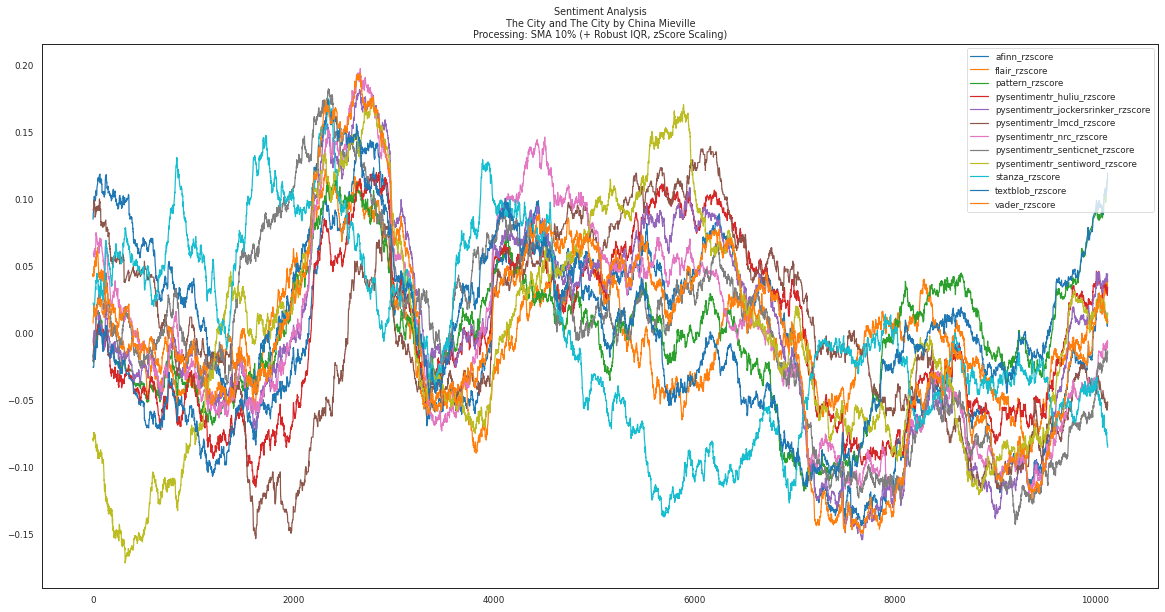

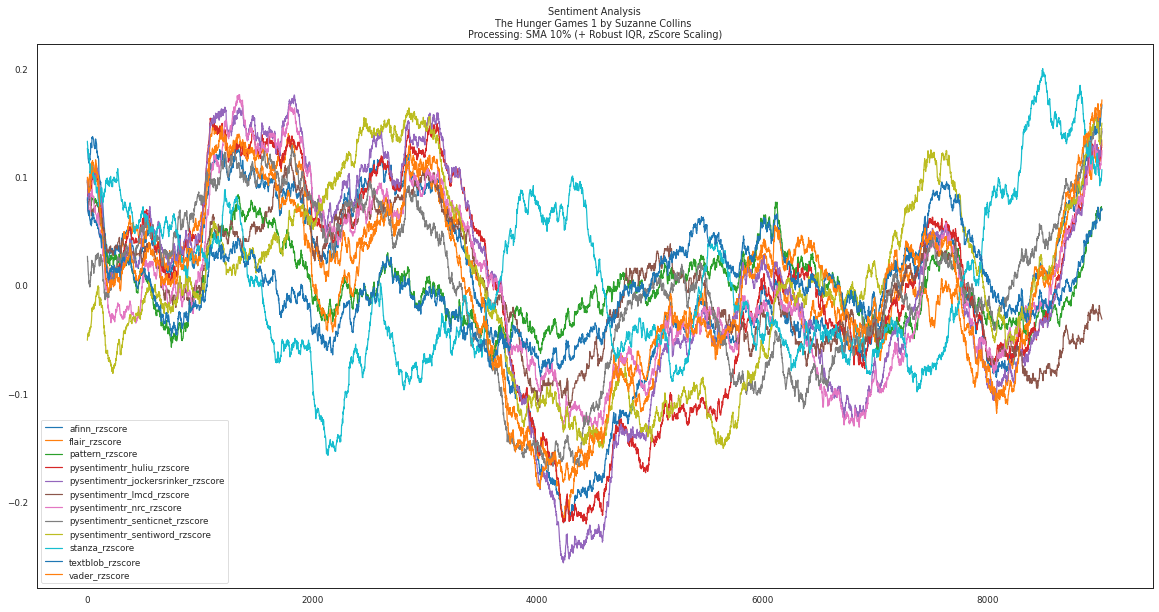

In [ ]:
# Plot Sentiment Time Series for all Models in this Notebook run so far

for i, atitle in enumerate(corpus_titles_ls):
  col_rzscores_ls = []
  print(f"Title #{i}: {atitle}")
  df = corpus_texts_dt[atitle].copy()
  numeric_cols_ls = df.select_dtypes(include=[np.number]).columns
  for anum_col_str in numeric_cols_ls:
    anum_col_robust_np = r_scaler.fit_transform(df[anum_col_str].values.reshape(-1, 1) )
    anum_col_rzscore_np = z_scaler.fit_transform(anum_col_robust_np)
    anum_col_rzscore_str = f'{anum_col_str}_rzscore'
    df[anum_col_rzscore_str] = pd.Series(anum_col_rzscore_np.squeeze(-1,))
    col_rzscores_ls.append(anum_col_rzscore_str)


  win_10per = int(0.10 * df.shape[0])
  df[col_rzscores_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f"Sentiment Analysis\n{corpus_titles_dt[atitle][0]}\nProcessing: SMA 10% (+ Robust IQR, zScore Scaling)")

# **[STEP 4] SyuzhetR (4 Lexicon Models)**

In [ ]:
# Verify text_clean of first Text

corpus_texts_dt[corpus_titles_ls[0]]['text_clean'].to_list()[:10]

['annotation',
 'the city be beszel a rundown metropolis on the eastern edge of europe',
 'the other city be ul qoma a modern eastern european boomtown despite be a bite of a international pariah',
 'what the two city share and what they do not be the deliciously evocative conundrum at the heart of china mieville s the city the city',
 'mieville be good know a a modern fantasist and urbanist but from book to book he be try on different genre and here he be fully hard boil strip down to a see it all detective s voice that be wonderfully appropriate for this story of see and unseen',
 'his detective be inspector tyador borlu a cop in beszel whose investigation of the murder of a young foreign woman take him back and forth across the highly police border to ul qoma to uncover a crime that threaten the delicate balance between the city and perhaps much so borlu s own dissolve sense of identity',
 'in his tale of two city mieville create a world both fantastic and unsettlingly familiar whos

In [69]:
corpus_texts_dt.keys()

dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

In [ ]:
%%time

# Compute Sentiments from all 4 Syuzhet Models applied to all 32 Novels (4 x 32 = 128 runs)

# NOTE:  9m45s 23:30 on 20220114 Colab Pro (33 Novels)
#       28:32s 21:06 on 20220226 Colab Pro (33 Novels)
#        3m20s 19:11 on 20220217 Colab Pro (2 Novels)
#        3m05s 19:17 on 20220217 Colab Pro (2 Novels)

# base = importr('base')
syuzhet = importr('syuzhet')

# corpus_syuzhetr_dt = {}

models_ls = corpus_texts_dt[corpus_titles_ls[0]].columns
texts_titles_ls = list(corpus_texts_dt.keys())
texts_titles_ls.sort()
for i, atext in enumerate(texts_titles_ls):
  models_ls = corpus_texts_dt[atext].columns
  print(f'Processing Novel #{i}: {atext}...')
  if 'syuzhetr_syuzhet' not in models_ls:
    corpus_texts_dt[atext]['syuzhetr_syuzhet'] = syuzhet.get_sentiment(corpus_texts_dt[atext]['text_clean'].to_list(), method='syuzhet')
  if 'syuzhetr_bing' not in models_ls:
    corpus_texts_dt[atext]['syuzhetr_bing'] = syuzhet.get_sentiment(corpus_texts_dt[atext]['text_clean'].to_list(), method='bing')
  if 'syuzhetr_afinn' not in models_ls:
    corpus_texts_dt[atext]['syuzhetr_afinn'] = syuzhet.get_sentiment(corpus_texts_dt[atext]['text_clean'].to_list(), method='afinn')
  if 'syuzhetr_nrc' not in models_ls:
    corpus_texts_dt[atext]['syuzhetr_nrc'] = syuzhet.get_sentiment(corpus_texts_dt[atext]['text_clean'].to_list(), method='nrc')

Processing Novel #0: cmieville_thecityandthecity...
Processing Novel #1: scollins_thehungergames1...
CPU times: user 194 ms, sys: 21.3 ms, total: 215 ms
Wall time: 224 ms


In [ ]:
# Verify First Text in Corpus has New SyuzhetR Columns with Plausible Values

corpus_texts_dt[corpus_titles_ls[0]].head()

corpus_texts_dt[corpus_titles_ls[0]].info()

,sentimentr_huliu,sentimentr_jockers,sentimentr_jockersrinker,sentimentr_loughran_mcdonald,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_socal_google,syuzhetr_afinn,syuzhetr_bing,syuzhetr_nrc,syuzhetr_syuzhet,text_clean,text_raw
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.00,annotation,Annotation
1,0.000000,-0.069338,-0.069338,0.000000,0.000000,-0.153652,0.069338,0.000000,0,0,0.0,-0.25,the city be beszel a rundown metropolis on the eastern edge of europe,"The city is Beszel, a rundown metropolis on the eastern edge of Europe."
2,0.000000,-0.114708,-0.114708,0.229416,-0.229416,-0.161738,-0.243754,1.465145,0,0,-1.0,-0.50,the other city be ul qoma a modern eastern european boomtown despite be a bite of a internationa...,"The other city is Ul Qoma, a modern Eastern European boomtown, despite being a bit of an interna..."
3,-0.196116,0.176505,0.176505,0.000000,0.196116,-0.110413,0.318689,0.323069,1,1,1.0,0.10,what the two city share and what they do not be the deliciously evocative conundrum at the heart...,"What the two cities share, and what they don't, is the deliciously evocative conundrum at the he..."
4,0.285714,0.464286,0.321429,0.142857,0.142857,0.691878,0.189286,1.829677,8,2,1.0,3.25,mieville be good know a a modern fantasist and urbanist but from book to book he be try on diffe...,"Mieville is well known as a modern fantasist (and urbanist), but from book to book he's tried on..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sentimentr_huliu              10125 non-null  float64
 1   sentimentr_jockers            10125 non-null  float64
 2   sentimentr_jockersrinker      10125 non-null  float64
 3   sentimentr_loughran_mcdonald  10125 non-null  float64
 4   sentimentr_nrc                10125 non-null  float64
 5   sentimentr_senticnet          10125 non-null  float64
 6   sentimentr_sentiword          10125 non-null  float64
 7   sentimentr_socal_google       10125 non-null  float64
 8   syuzhetr_afinn                10125 non-null  int64  
 9   syuzhetr_bing                 10125 non-null  int64  
 10  syuzhetr_nrc                  10125 non-null  float64
 11  syuzhetr_syuzhet              10125 non-null  float64
 12  text_clean                    10125 non-null  object 
 13  t

## Checkpoint: Save Sentiment

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

# Save sentiment values to subdir_sentiments
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[corpus_titles_ls[0]].info()


Saving file to: ./sentiment_raw/novels_sentiment_new_raw/sentiment_raw_novels_new_syuzhetr2sentimentr.json
Saving Corpus_Genre: novels
        Corpus_Type: new


These Text Titles:


dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

,sentimentr_huliu,sentimentr_jockers,sentimentr_jockersrinker,sentimentr_loughran_mcdonald,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_socal_google,syuzhetr_afinn,syuzhetr_bing,syuzhetr_nrc,syuzhetr_syuzhet,text_clean,text_raw
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.00,annotation,Annotation
1,0.000000,-0.069338,-0.069338,0.000000,0.000000,-0.153652,0.069338,0.000000,0,0,0.0,-0.25,the city be beszel a rundown metropolis on the eastern edge of europe,"The city is Beszel, a rundown metropolis on the eastern edge of Europe."
2,0.000000,-0.114708,-0.114708,0.229416,-0.229416,-0.161738,-0.243754,1.465145,0,0,-1.0,-0.50,the other city be ul qoma a modern eastern european boomtown despite be a bite of a internationa...,"The other city is Ul Qoma, a modern Eastern European boomtown, despite being a bit of an interna..."
3,-0.196116,0.176505,0.176505,0.000000,0.196116,-0.110413,0.318689,0.323069,1,1,1.0,0.10,what the two city share and what they do not be the deliciously evocative conundrum at the heart...,"What the two cities share, and what they don't, is the deliciously evocative conundrum at the he..."
4,0.285714,0.464286,0.321429,0.142857,0.142857,0.691878,0.189286,1.829677,8,2,1.0,3.25,mieville be good know a a modern fantasist and urbanist but from book to book he be try on diffe...,"Mieville is well known as a modern fantasist (and urbanist), but from book to book he's tried on..."




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sentimentr_huliu              10125 non-null  float64
 1   sentimentr_jockers            10125 non-null  float64
 2   sentimentr_jockersrinker      10125 non-null  float64
 3   sentimentr_loughran_mcdonald  10125 non-null  float64
 4   sentimentr_nrc                10125 non-null  float64
 5   sentimentr_senticnet          10125 non-null  float64
 6   sentimentr_sentiword          10125 non-null  float64
 7   sentimentr_socal_google       10125 non-null  float64
 8   syuzhetr_afinn                10125 non-null  int64  
 9   syuzhetr_bing                 10125 non-null  int64  
 10  syuzhetr_nrc                  10125 non-null  float64
 11  syuzhetr_syuzhet              10125 non-null  float64
 12  text_clean                    10125 non-null  object 
 13 

## Plot SyuzhetR 4 Models

In [ ]:
#@markdown Select option to save plots:
Save_Raw_Plots = True #@param {type:"boolean"}

Save_Smooth_Plots = True #@param {type:"boolean"}
Resolution = "300" #@param ["100", "300"]



In [ ]:
# Get Col Names for all 4 SyuzhetR Models from first Text DataFrame

cols_all_ls = corpus_texts_dt[next(iter(corpus_texts_dt))].columns

cols_syuzhetr_ls = [x for x in cols_all_ls if 'syuzhetr_' in x]
cols_syuzhetr_ls

['syuzhetr_afinn', 'syuzhetr_bing', 'syuzhetr_nrc', 'syuzhetr_syuzhet']

Novel #0: The City and The City by China Mieville


Saving to: ./plots/plot_syuzhetr_raw_cmieville_thecityandthecity_dpi300.png




Saving to: ./plots/plot_syuzhetr_smooth10sma_cmieville_thecityandthecity_dpi300.png
Novel #1: The Hunger Games 1 by Suzanne Collins 


Saving to: ./plots/plot_syuzhetr_raw_scollins_thehungergames1_dpi300.png




Saving to: ./plots/plot_syuzhetr_smooth10sma_scollins_thehungergames1_dpi300.png


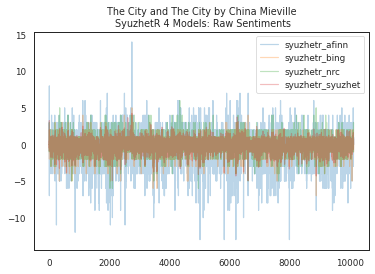

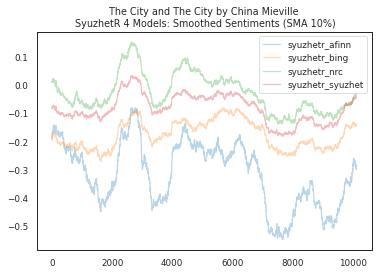

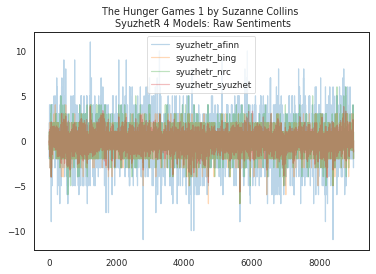

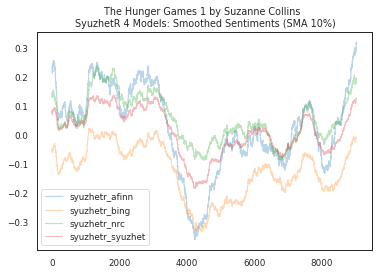

In [ ]:
# Verify 4 SyuzhetR Models with Plots (Unnormalized, raw sentiment values)

for i, anovel in enumerate(list(corpus_texts_dt.keys())):

  print(f'Novel #{i}: {corpus_titles_dt[anovel][0]}')

  # Raw Sentiments 
  fig = corpus_texts_dt[anovel][cols_syuzhetr_ls].plot(title=f'{corpus_titles_dt[anovel][0]}\n SyuzhetR 4 Models: Raw Sentiments', alpha=0.3)
  # plt.show();

  if Save_Raw_Plots:
    save_filename = f'{SUBDIR_PLOTS}plot_syuzhetr_raw_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))

  
  # Smoothed Sentiments (SMA 10%)
  # novel_sample = 'cdickens_achristmascarol'
  win_10per = int(corpus_texts_dt[anovel].shape[0] * 0.1)
  corpus_texts_dt[anovel][cols_syuzhetr_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f'{corpus_titles_dt[anovel][0]}\n SyuzhetR 4 Models: Smoothed Sentiments (SMA 10%)', alpha=0.3)
  # plt.show();

  if Save_Smooth_Plots:
    save_filename = f'{SUBDIR_PLOTS}plot_syuzhetr_smooth10sma_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))


# **[STEP 5] SentimentR (7 Heuristic Models)**

In [ ]:
# Verify in SentimentArcs Root Directory and cd into ./utils for R programs
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
# %cd ./utils
!pwd

/gdrive/MyDrive/cdh/sentiment_arcs/utils
/gdrive/MyDrive/cdh/sentiment_arcs/utils


In [ ]:
# Setup python robject with external library::function()
# https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html

# import rpy2.robjects as robjects

# Defining the R script and loading the instance in Python
# from rpy2.robjects import pandas2ri 
r = robjects.r

# Loading the function we have defined in R.
r['source']('./utils/get_sentimentr.R')

# Reading and processing data
get_sentimentr_function_r = robjects.globalenv['get_sentimentr_values']

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [ ]:
# Test

# Convert Python List of Strings to a R vector of characters
test_ls = corpus_texts_dt[next(iter(corpus_texts_dt))]['text_clean'].to_list()
s_v = robjects.StrVector(test_ls)
type(s_v)

get_sentimentr_function_r(s_v)

rpy2.robjects.vectors.StrVector

[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"


text_clean,sentimentr_jockersrinker,sentimentr_jockers,...,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
'annotati...,0.000000,0.000000,...,0.000000,0.000000,0.000000
'the city...,-0.069338,-0.069338,,0.069338,0.000000,0.000000
'the othe...,-0.114708,-0.114708,,-0.243754,0.229416,1.465145
'what the...,0.176505,0.176505,,0.318689,0.000000,0.323069
...,...,...,,...,...,...
'we be al...,0.081650,0.081650,,0.229640,-0.204124,0.000000
'on that ...,-0.377964,0.000000,,0.283473,0.000000,-0.251674
'i live i...,0.000200,0.000200,,0.406313,0.000000,0.000000
'librs net',0.000000,0.000000,,0.000000,0.000000,1.978817


**[RE-EXECUTE] May have to re-execute following code cell several times**

In [ ]:
%%time

# NOTE: 8m19s 13 Novels 
#      16m39s 19 Novels
#     -----------------
#      24m58s 32 Novels
#       5m00s  @19:44 on 20220227 Colab Pro (2 Novels)
#     
#       2m13s @00:00 on 20220304 Colab Pro (2 Novels)

# Call external get_sentimentr::get_sentimentr_values with Python loop over all novels

# novels_sentimentr_dt = {}

# Verify in SentimentArcs Root Directory and cd into ./utils for R programs
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

atext_df = pd.DataFrame()

corpus_titles_ls = list(corpus_texts_dt.keys())
corpus_titles_ls.sort()

# for i, atext in enumerate(corpus_titles_ls[:19]):
for i, atext in enumerate(corpus_titles_ls):  
  print(f'\nProcessing Novel #{i}: {atext}')
  
  models_ls = corpus_texts_dt[atext].columns

  # Delete contents of atext_df DataFrame
  atext_df = atext_df[0:0]

  print(f'     {corpus_texts_dt[atext].shape}')
  # Get text_clean as list of strings
  text_clean_ls = corpus_texts_dt[atext]['text_clean'].to_list()

  # Convert Python List of Strings to a R vector of characters
  # https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html
  s_v = robjects.StrVector(text_clean_ls)
  atext_df_r = get_sentimentr_function_r(s_v)

  # Convert rpy2.robjects.vectors.DataFrame to pandas.core.frame.DataFrame
  # https://stackoverflow.com/questions/20630121/pandas-how-to-convert-r-dataframe-back-to-pandas 
  print(f'type(atext_df_r): {type(atext_df_r)}')
  atext_df = pd.DataFrame.from_dict({ key : np.asarray(atext_df_r.rx2(key)) for key in atext_df_r.names })
  print(f'type(atext_df): {type(atext_df)}')

  # Save Results
  # novels_dt[atext] = atext_df.copy(deep=True)

  # TODO: R Object computes all SentimentR models, cannot selectively update like SyuzhetR code copied below
  #       left in place as reminder to implement selective model updates if R-Python exchange has finer resolution in future
  # This works for Novels New Corpus Texts
  if True: # 'sentimentr_jockersrinker' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_jockersrinker'] = atext_df['sentimentr_jockersrinker']
  if True: #  'sentimentr_jockers' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_jockers'] = atext_df['sentimentr_jockers']
  if True: #  'sentimentr_huliu' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_huliu'] = atext_df['sentimentr_huliu']
  if True: #  'sentimentr_nrc' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_nrc'] = atext_df['sentimentr_nrc']
  if True: #  'sentimentr_senticnet' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_senticnet'] = atext_df['sentimentr_senticnet']
  if True: #  'sentimentr_sentiword' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_sentiword'] = atext_df['sentimentr_sentiword']
  if True: #  'sentimentr_loughran_mcdonald' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_loughran_mcdonald'] = atext_df['sentimentr_loughran_mcdonald']
  if True: #  'sentimentr_socal_google' not in models_ls:
    corpus_texts_dt[atext]['sentimentr_socal_google'] = atext_df['sentimentr_socal_google'] 


Processing Novel #0: cmieville_thecityandthecity
     (10125, 14)
[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"
type(atext_df_r): <class 'rpy2.robjects.vectors.DataFrame'>
type(atext_df): <class 'pandas.core.frame.DataFrame'>

Processing Novel #1: scollins_thehungergames1
     (9021, 14)
[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"
type(atext_df_r): <class 'rpy2.robjects.vectors.DataFrame'>
type(atext_df): <class 'pandas.core.frame.DataFrame'>
CPU times: user 2min 3s, sys

In [ ]:
# Verify SentimentR results

corpus_texts_dt[corpus_titles_ls[0]].head()
corpus_texts_dt[corpus_titles_ls[0]].info()

,sentimentr_huliu,sentimentr_jockers,sentimentr_jockersrinker,sentimentr_loughran_mcdonald,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_socal_google,syuzhetr_afinn,syuzhetr_bing,syuzhetr_nrc,syuzhetr_syuzhet,text_clean,text_raw
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.00,annotation,Annotation
1,0.000000,-0.069338,-0.069338,0.000000,0.000000,-0.153652,0.069338,0.000000,0,0,0.0,-0.25,the city be beszel a rundown metropolis on the eastern edge of europe,"The city is Beszel, a rundown metropolis on the eastern edge of Europe."
2,0.000000,-0.114708,-0.114708,0.229416,-0.229416,-0.161738,-0.243754,1.465145,0,0,-1.0,-0.50,the other city be ul qoma a modern eastern european boomtown despite be a bite of a internationa...,"The other city is Ul Qoma, a modern Eastern European boomtown, despite being a bit of an interna..."
3,-0.196116,0.176505,0.176505,0.000000,0.196116,-0.110413,0.318689,0.323069,1,1,1.0,0.10,what the two city share and what they do not be the deliciously evocative conundrum at the heart...,"What the two cities share, and what they don't, is the deliciously evocative conundrum at the he..."
4,0.285714,0.464286,0.321429,0.142857,0.142857,0.691878,0.189286,1.829677,8,2,1.0,3.25,mieville be good know a a modern fantasist and urbanist but from book to book he be try on diffe...,"Mieville is well known as a modern fantasist (and urbanist), but from book to book he's tried on..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sentimentr_huliu              10125 non-null  float64
 1   sentimentr_jockers            10125 non-null  float64
 2   sentimentr_jockersrinker      10125 non-null  float64
 3   sentimentr_loughran_mcdonald  10125 non-null  float64
 4   sentimentr_nrc                10125 non-null  float64
 5   sentimentr_senticnet          10125 non-null  float64
 6   sentimentr_sentiword          10125 non-null  float64
 7   sentimentr_socal_google       10125 non-null  float64
 8   syuzhetr_afinn                10125 non-null  int64  
 9   syuzhetr_bing                 10125 non-null  int64  
 10  syuzhetr_nrc                  10125 non-null  float64
 11  syuzhetr_syuzhet              10125 non-null  float64
 12  text_clean                    10125 non-null  object 
 13  t

In [ ]:
# Verify the SentimentR Models/Columns in Particular

cols_sentimentr_ls = [x for x in corpus_texts_dt[corpus_titles_ls[0]].columns if 'sentimentr_' in x]
cols_sentimentr_ls

# Verify DataFrame shape of first Text in Corpus
print(f'\n\nThe first Text in the Corpus: [{corpus_titles_ls[0]}] has the shape: {corpus_texts_dt[corpus_titles_ls[0]].shape}')

['sentimentr_huliu',
 'sentimentr_jockers',
 'sentimentr_jockersrinker',
 'sentimentr_loughran_mcdonald',
 'sentimentr_nrc',
 'sentimentr_senticnet',
 'sentimentr_sentiword',
 'sentimentr_socal_google']



The first Text in the Corpus: [cmieville_thecityandthecity] has the shape: (10125, 14)


## Checkpoint: Save Sentiments

In [ ]:
# Save sentiment values to subdir_sentiments

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[corpus_titles_ls[0]].info()


Saving file to: ./sentiment_raw/novels_sentiment_new_raw/sentiment_raw_novels_new_syuzhetr2sentimentr.json
Saving Corpus_Genre: novels
        Corpus_Type: new


These Text Titles:


dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

,sentimentr_huliu,sentimentr_jockers,sentimentr_jockersrinker,sentimentr_loughran_mcdonald,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_socal_google,syuzhetr_afinn,syuzhetr_bing,syuzhetr_nrc,syuzhetr_syuzhet,text_clean,text_raw
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.00,annotation,Annotation
1,0.000000,-0.069338,-0.069338,0.000000,0.000000,-0.153652,0.069338,0.000000,0,0,0.0,-0.25,the city be beszel a rundown metropolis on the eastern edge of europe,"The city is Beszel, a rundown metropolis on the eastern edge of Europe."
2,0.000000,-0.114708,-0.114708,0.229416,-0.229416,-0.161738,-0.243754,1.465145,0,0,-1.0,-0.50,the other city be ul qoma a modern eastern european boomtown despite be a bite of a internationa...,"The other city is Ul Qoma, a modern Eastern European boomtown, despite being a bit of an interna..."
3,-0.196116,0.176505,0.176505,0.000000,0.196116,-0.110413,0.318689,0.323069,1,1,1.0,0.10,what the two city share and what they do not be the deliciously evocative conundrum at the heart...,"What the two cities share, and what they don't, is the deliciously evocative conundrum at the he..."
4,0.285714,0.464286,0.321429,0.142857,0.142857,0.691878,0.189286,1.829677,8,2,1.0,3.25,mieville be good know a a modern fantasist and urbanist but from book to book he be try on diffe...,"Mieville is well known as a modern fantasist (and urbanist), but from book to book he's tried on..."




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sentimentr_huliu              10125 non-null  float64
 1   sentimentr_jockers            10125 non-null  float64
 2   sentimentr_jockersrinker      10125 non-null  float64
 3   sentimentr_loughran_mcdonald  10125 non-null  float64
 4   sentimentr_nrc                10125 non-null  float64
 5   sentimentr_senticnet          10125 non-null  float64
 6   sentimentr_sentiword          10125 non-null  float64
 7   sentimentr_socal_google       10125 non-null  float64
 8   syuzhetr_afinn                10125 non-null  int64  
 9   syuzhetr_bing                 10125 non-null  int64  
 10  syuzhetr_nrc                  10125 non-null  float64
 11  syuzhetr_syuzhet              10125 non-null  float64
 12  text_clean                    10125 non-null  object 
 13 

## Plot SentimentR 7 Models

In [ ]:
#@markdown Select option to save plots:
Save_Raw_Plots = True #@param {type:"boolean"}

Save_Smooth_Plots = True #@param {type:"boolean"}
Resolution = "300" #@param ["100", "300"]



Novel #0: The City and The City by China Mieville


Saving to: ./plots/plot_sentimentr_raw_cmieville_thecityandthecity_dpi300.png




Saving to: ./plots/plot_sentimentr_smooth10sma_cmieville_thecityandthecity_dpi300.png
Novel #1: The Hunger Games 1 by Suzanne Collins 


Saving to: ./plots/plot_sentimentr_raw_scollins_thehungergames1_dpi300.png




Saving to: ./plots/plot_sentimentr_smooth10sma_scollins_thehungergames1_dpi300.png


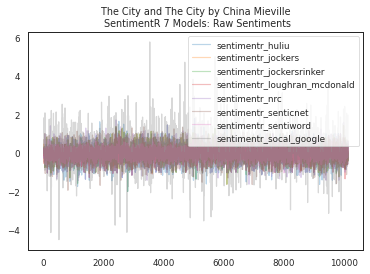

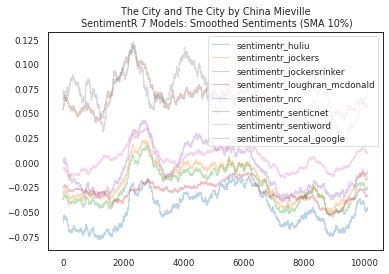

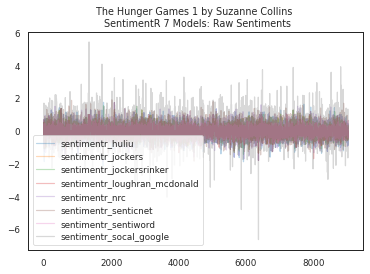

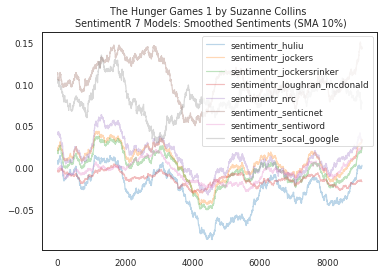

In [ ]:
# Verify 7 SentimentR Models with Plots

for i, anovel in enumerate(list(corpus_texts_dt.keys())):

  print(f'Novel #{i}: {corpus_titles_dt[anovel][0]}')

  # Raw Sentiments 
  fig = corpus_texts_dt[anovel][cols_sentimentr_ls].plot(title=f'{corpus_titles_dt[anovel][0]}\n SentimentR 7 Models: Raw Sentiments', alpha=0.3)
  # plt.show();

  if Save_Raw_Plots:
    save_filename = f'{SUBDIR_PLOTS}plot_sentimentr_raw_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))

  
  # Smoothed Sentiments (SMA 10%)
  # novel_sample = 'cdickens_achristmascarol'
  win_10per = int(corpus_texts_dt[anovel].shape[0] * 0.1)
  corpus_texts_dt[anovel][cols_sentimentr_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f'{corpus_titles_dt[anovel][0]}\n SentimentR 7 Models: Smoothed Sentiments (SMA 10%)', alpha=0.3)
  # plt.show();

  if Save_Smooth_Plots:
    save_filename = f'{SUBDIR_PLOTS}plot_sentimentr_smooth10sma_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))


# **END OF NOTEBOOK**

---